# DDoS_ML_Sup-V1.3

## Résumé de différentes étapes:


### A - Créer une Dataset 
##### * Analyser les information requise
##### * Analyser la quantiter de paquets moyennés nécéssaire dans chaque info
#### * Créer une pré-dataset
#### * Transformer la pré-dataset en dataset final

### B - Créer un réseau de neurones convenable
##### * Analyser le nombre d'entrée
##### * Entrainer les neurones
##### * Analyser les résultats
##### * Ajuster

### C - Analyser les résultat de l'IA




### A - 1 - Créer une Dataset
- Poids moyen des paquets
- Delta time moyen entre chaque paquets
- Pourcentage d'uttilisation de chaque protocole
- Nombre de paquets par seconde
- Pourcentage de fois la meme IP src/dst
- Pourcentage de fois le meme port src/dst

### A - 2 - Créer une Dataset
1er éssaie: Un éssai sur des groupes de 100 paquets

### A - 3 - Créer une Dataset

#### Note:
Pourquoi pas rajouter l'écart moyen entre la len moyenne ?
Pourquoi pas rajouter le timeflow de chaque ?

###### Pré-Dataset:
Timestamp | Delta time | Len paquets fwd | Len paquets bwd | Ip src | port src | Ip dst | Port dst | Protocole | Label


###### Dataset final:
   Delta Time | Len paquets Fwd| Len paquets Bwd | Paquet/s | % meme Ip src | % meme port src | % meme Ip dst | % meme port dst |  totalité protocole

###### Création et utilisation de: ds_create.py

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys
import datetime
from sklearn.utils import shuffle

### Importation de la dataset

In [2]:
path_to_benign_csv = "/run/media/Thytu/TOSHIBA EXT/PoC/Smartshark/DS/ds_benign_cleared_div_3_16rows.csv"
path_to_ddos_csv = "/run/media/Thytu/TOSHIBA EXT/PoC/Smartshark/DS/ds_DDOS_16rows.csv"

### Avoir une idée de la dataset

In [4]:
benign_csv = pd.read_csv(path_to_benign_csv, names=["SourcePort", "DestinationPort", "Protocol", "FlowDuration", "TotalFwdPackets", "TotalBackwardPackets", "TotalLengthofFwdPackets", "TotalLengthofBwdPackets", "FwdPacketLengthMean", "FwdPacketLengthStd", "BwdPacketLengthMean", "BwdPacketLengthStd", "PacketLengthMean", "PacketLengthStd", "PacketLengthVariance", "AveragePacketSize"], dtype='float')
ddos_csv = pd.read_csv(path_to_ddos_csv, names=["SourcePort", "DestinationPort", "Protocol", "FlowDuration", "TotalFwdPackets", "TotalBackwardPackets", "TotalLengthofFwdPackets", "TotalLengthofBwdPackets", "FwdPacketLengthMean", "FwdPacketLengthStd", "BwdPacketLengthMean", "BwdPacketLengthStd", "PacketLengthMean", "PacketLengthStd", "PacketLengthVariance", "AveragePacketSize"], dtype='float')

In [5]:
benign_csv.tail()

,SourcePort,DestinationPort,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMean,BwdPacketLengthStd,PacketLengthMean,PacketLengthStd,PacketLengthVariance,AveragePacketSize
3085831,48831.0,53.0,17.0,278203.0,1.0,1.0,35.0,307.0,35.0,0.000000,307.0,0.000000,125.666667,157.039273,24661.333333,188.50
3085832,15188.0,53.0,17.0,304.0,1.0,1.0,37.0,290.0,37.0,0.000000,290.0,0.000000,121.333333,146.069618,21336.333333,182.00
3085833,60209.0,53.0,17.0,3215689.0,1.0,1.0,33.0,358.0,33.0,0.000000,358.0,0.000000,141.333333,187.638837,35208.333333,212.00
3085834,32726.0,53.0,17.0,20586683.0,2.0,2.0,76.0,765.0,38.0,2.828427,382.5,58.689863,175.400000,191.326423,36605.800000,219.25
3085835,54499.0,53.0,17.0,4634023.0,1.0,1.0,32.0,320.0,32.0,0.000000,320.0,0.000000,128.000000,166.276878,27648.000000,1.00


In [6]:
ddos_csv.tail()

,SourcePort,DestinationPort,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMean,BwdPacketLengthStd,PacketLengthMean,PacketLengthStd,PacketLengthVariance,AveragePacketSize
2113229,610.0,9866.0,17.0,2.0,2.0,0.0,2912.0,0.0,1456.0,0.0,0.0,0.0,1456.0,0.0,0.0,2184.0
2113230,611.0,2923.0,17.0,2.0,2.0,0.0,2944.0,0.0,1472.0,0.0,0.0,0.0,1472.0,0.0,0.0,2208.0
2113231,612.0,1220.0,17.0,3.0,2.0,0.0,2944.0,0.0,1472.0,0.0,0.0,0.0,1472.0,0.0,0.0,2208.0
2113232,613.0,12648.0,17.0,2.0,2.0,0.0,2944.0,0.0,1472.0,0.0,0.0,0.0,1472.0,0.0,0.0,2208.0
2113233,614.0,10295.0,17.0,2.0,2.0,0.0,2944.0,0.0,1472.0,0.0,0.0,0.0,1472.0,0.0,0.0,2208.0


### Préparation finale de la dataset
#### Mélange des deux dataset pour en former plus qu'une seul et création des labels

#### Suffling the dataset

In [7]:
benign_csv = shuffle(benign_csv)
ddos_scsv = shuffle(ddos_csv)

In [8]:
benign_csv = benign_csv.values.reshape(len(benign_csv), 16)
ddos_csv = ddos_csv.values.reshape(len(ddos_csv), 16)

def create_mixed_data_set_with_label(benign, ddos):
    dataset = []
    label = []
    index_benign = 0
    index_ddos = 0
    index = 0
    while (index < (len(benign) + len(ddos) - 1)):
        if (index % 2 and index_benign < len(benign)):
            dataset.append(benign[index_benign])
            index_benign += 1
            label.append(0)
        elif index_ddos < len(ddos):
            dataset.append(ddos[index_ddos])
            index_ddos += 1
            label.append(1)
        index += 1
    return (dataset, label)
dataset, label = create_mixed_data_set_with_label(benign_csv, ddos_csv)

##### Dataset reduction (optional)

In [9]:
reduction_facteur = 0.3 # <= 1

dataset = dataset[:int(len(dataset) * reduction_facteur)]
label = label[:int(len(label) * reduction_facteur)]

#### Diminiuer l'effet des grands nombres pour facilité l'apprentissage du réseau

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

#### Création de la DS de test

In [11]:
test = dataset[0:int(len(dataset) * 0.2)]
test_label = label[0:int(len(label) * 0.2)]

dataset = dataset[int(len(dataset) * 0.2):]
label = label[int(len(label) * 0.2):]

#### Transformation de la list en np.array

In [12]:
label = np.array(label)
test_label = np.array(test_label)

##### Shuffle des DS

In [13]:
dataset, label = shuffle(dataset, label)
test, test_label = shuffle(test, test_label)

#### Création du model 

In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation="relu", input_shape=(16,)),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

##### Logs creation

In [15]:
logs_path = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_path, histogram_freq=1)

#### Entrainement du model

In [16]:
history = model.fit(dataset, label, epochs=1, validation_data=(test, test_label), callbacks=[tensorboard_callback])

Train on 1131064 samples, validate on 282766 samples
1131064/1131064 [==============================] - 92s 81us/sample - loss: 0.0290 - accuracy: 0.9928 - val_loss: 0.0318 - val_accuracy: 0.9964


#### Résultat sous graphique du model

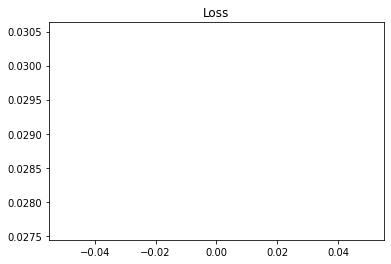

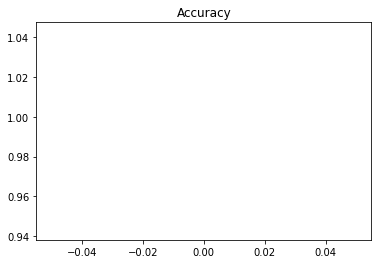

In [17]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()

In [18]:
model.evaluate(test, test_label, batch_size=1000)

282766/282766 [==============================] - 0s 2us/sample - loss: 0.0318 - accuracy: 0.9964


[0.03181476285081361, 0.9963963]

##### Creation of data to evaluate false positives number

In [21]:
false_positives_test = scaler.fit_transform(benign_csv[len(benign_csv) - 100000:])
false_positives_label = np.array([0] * 100_000)

## Analyzing results

#### Evaluation of false positives number

In [22]:
model.evaluate(false_positives_test, false_positives_label, batch_size=100)

100000/100000 [==============================] - 1s 13us/sample - loss: 4.8787 - accuracy: 0.4506


[4.878682788133621, 0.45058]

##### Creation of data to evaluate false negatives number

In [24]:
false_negatives_test = scaler.fit_transform(ddos_csv[len(ddos_csv) - 100_000:])
false_negatives_label = np.array([1] * 100_000)

#### Evaluation of false negatives number

In [25]:
model.evaluate(false_negatives_test, false_negatives_label, batch_size=1000)

100000/100000 [==============================] - 0s 2us/sample - loss: 0.9147 - accuracy: 0.9213


[0.9146973443031311, 0.92127]

#### Same test on (splited) trained dataset

In [26]:
benign_verification_set = []
ddos_verification_set = []

for index, packet in enumerate(dataset):
    if (label[index] == 1):
        ddos_verification_set.append(dataset[index])
    else:
        benign_verification_set.append(dataset[index])

benign_verification_label = [0] * len(benign_verification_set)
ddos_verification_label = [1] * len(ddos_verification_set)

benign_verification_set = np.array(benign_verification_set)
benign_verification_label = np.array(benign_verification_label)

ddos_verification_set = np.array(ddos_verification_set)
ddos_verification_label = np.array(ddos_verification_label)

In [27]:
model.evaluate(benign_verification_set, benign_verification_label, batch_size=1000)

565532/565532 [==============================] - 1s 2us/sample - loss: 0.0185 - accuracy: 0.9950


[0.018516065182009076, 0.9949817]

In [28]:
model.evaluate(ddos_verification_set, ddos_verification_label, batch_size=1000)

565532/565532 [==============================] - 1s 2us/sample - loss: 0.0175 - accuracy: 0.9936


[0.01753797017270635, 0.9936449]

#### Same test on (splited) test dataset

In [29]:
benign_verification_set = []
ddos_verification_set = []

for index, packet in enumerate(test):
    if (test_label[index] == 1):
        ddos_verification_set.append(test[index])
    else:
        benign_verification_set.append(test[index])

benign_verification_label = [0] * len(benign_verification_set)
ddos_verification_label = [1] * len(ddos_verification_set)

benign_verification_set = np.array(benign_verification_set)
benign_verification_label = np.array(benign_verification_label)

ddos_verification_set = np.array(ddos_verification_set)
ddos_verification_label = np.array(ddos_verification_label)

In [30]:
model.evaluate(benign_verification_set, benign_verification_label, batch_size=1000)

141383/141383 [==============================] - 0s 2us/sample - loss: 0.0195 - accuracy: 0.9946


[0.0194767298158559, 0.9945609]

In [31]:
model.evaluate(ddos_verification_set, ddos_verification_label, batch_size=1000)

141383/141383 [==============================] - 0s 2us/sample - loss: 0.0442 - accuracy: 0.9982


[0.04415280181333126, 0.99823177]